## TRABAJO MINERÍA DE DATOS 01 

In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def downloadFromURL(url, filename, sep = ",", delim = "\n", encoding="utf-8", 
                   mainpath = "datasets"):
    #primero importamos la librería y hacemos la conexión con la web de los datos
    import urllib3
    http = urllib3.PoolManager()
    r = http.request('GET', url)
    print("El estado de la respuesta es %d" %(r.status))
    response = r.data ## CORREGIDO: eliminado un doble decode que daba error
    
    #El objeto reponse contiene un string binario, así que lo convertimos a un string descodificándolo en UTF-8
    str_data = response.decode(encoding)

    #Dividimos el string en un array de filas, separándolo por intros
    lines = str_data.split(delim)

    #La primera línea contiene la cabecera, así que la extraemos
    col_names = lines[0].split(sep)
    n_cols = len(col_names)

    #Generamos un diccionario vacío donde irá la información procesada desde la URL externa
    counter = 0
    main_dict = {}
    for col in col_names:
        main_dict[col] = []

    #Procesamos fila a fila la información para ir rellenando el diccionario con los datos como hicimos antes
    for line in lines:
        #Nos saltamos la primera línea que es la que contiene la cabecera y ya tenemos procesada
        if(counter > 0):
            #Dividimos cada string por las comas como elemento separador
            values = line.strip().split(sep)
            #Añadimos cada valor a su respectiva columna del diccionario
            for i in range(len(col_names)):
                main_dict[col_names[i]].append(values[i])
        counter += 1

    print("El data set tiene %d filas y %d columnas"%(counter, n_cols))

    #Convertimos el diccionario procesado a Data Frame y comprobamos que los datos son correctos
    df = pd.DataFrame(main_dict)
    print(df.head())

    #Elegimos donde guardarlo (en la carpeta athletes es donde tiene más sentido por el contexto del análisis)
    fullpath = os.path.join(mainpath, filename)

    #Lo guardamos en CSV, en JSON o en Excel según queramos
    df.to_csv(fullpath+".csv")
    df.to_json(fullpath+".json")
    df.to_excel(fullpath+".xls")
    print("Los ficheros se han guardado correctamente en: "+fullpath)
    
    return df

In [16]:
medals_url = "http://winterolympicsmedals.com/medals.csv"

In [17]:
medals_data = pd.read_csv(medals_url)

In [18]:
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [23]:
medals_df = downloadFromURL(medals_url, "downloaded_medals")
medals_df.head()

El estado de la respuesta es 200
El data set tiene 2312 filas y 8 columnas
   Year      City       Sport      Discipline  NOC       Event Event gender  \
0  1924  Chamonix     Skating  Figure skating  AUT  individual            M   
1  1924  Chamonix     Skating  Figure skating  AUT  individual            W   
2  1924  Chamonix     Skating  Figure skating  AUT       pairs            X   
3  1924  Chamonix   Bobsleigh       Bobsleigh  BEL    four-man            M   
4  1924  Chamonix  Ice Hockey      Ice Hockey  CAN  ice hockey            M   

    Medal  
0  Silver  
1    Gold  
2    Gold  
3  Bronze  
4    Gold  
Los ficheros se han guardado correctamente en: datasets\downloaded_medals


,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [24]:
mainpath = "datasets"
filename = "downloaded_medals.csv"
fullpath = os.path.join(mainpath, filename)

In [25]:
data = pd.read_csv(fullpath)

In [26]:
data.head(10)

,Unnamed: 0,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


In [27]:
data.tail(8)

,Unnamed: 0,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
2303,2303,2006,Turin,Skiing,Freestyle Ski.,USA,moguls,M,Bronze
2304,2304,2006,Turin,Skiing,Snowboard,USA,Giant parallel slalom,W,Bronze
2305,2305,2006,Turin,Skiing,Snowboard,USA,Half-pipe,M,Gold
2306,2306,2006,Turin,Skiing,Snowboard,USA,Half-pipe,M,Silver
2307,2307,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Gold
2308,2308,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Silver
2309,2309,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,M,Gold
2310,2310,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,W,Silver


In [28]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [29]:
n = 500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [30]:
gender_data[1:10]

['Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male']

In [31]:
income_data[1:10]

['Rich',
 'Middle Class',
 'Rich',
 'Poor',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class']

In [32]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [33]:
data2 = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [34]:
data2.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,114.970488,86.044699,29.728648,18684.718706
1,Male,Rich,128.110787,54.984097,8.631671,20728.803308
2,Female,Middle Class,130.682692,29.530816,2.414877,19491.537259
3,Female,Rich,116.572110,58.558650,16.719435,19594.534408
4,Female,Poor,126.187720,34.213938,37.172523,19393.844516


## Agrupación de datos - ESIS

In [35]:
grouped_gender = data2.groupby("Gender")

In [36]:
grouped_gender.groups

{'Female': [0, 2, 3, 4, 5, 8, 11, 13, 14, 15, 19, 20, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 49, 50, 53, 55, 56, 57, 58, 59, 61, 66, 69, 70, 73, 75, 76, 77, 78, 79, 80, 81, 84, 85, 88, 89, 90, 92, 100, 101, 105, 107, 108, 109, 110, 113, 114, 123, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 141, 143, 145, 146, 149, 150, 151, 153, 154, 155, 156, 157, 162, 163, 164, 165, 169, 170, 172, 173, 174, 177, 180, 182, 188, ...], 'Male': [1, 6, 7, 9, 10, 12, 16, 17, 18, 21, 22, 23, 24, 26, 28, 36, 42, 46, 47, 48, 51, 52, 54, 60, 62, 63, 64, 65, 67, 68, 71, 72, 74, 82, 83, 86, 87, 91, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 106, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 128, 138, 139, 140, 142, 144, 147, 148, 152, 158, 159, 160, 161, 166, 167, 168, 171, 175, 176, 178, 179, 181, 183, 184, 185, 186, 187, 189, 190, 191, 193, 194, 195, 196, 199, 203, 206, 207, ...]}

In [37]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female    Middle Class  114.970488  86.044699  29.728648  18684.718706
2    Female    Middle Class  130.682692  29.530816   2.414877  19491.537259
3    Female            Rich  116.572110  58.558650  16.719435  19594.534408
4    Female            Poor  126.187720  34.213938  37.172523  19393.844516
5    Female            Poor  146.803186  96.841546  35.074597  20679.791951
..      ...             ...         ...        ...        ...           ...
487  Female            Poor  197.625970  65.164519  40.297995  20430.252815
488  Female            Poor  160.486467  62.603465  52.902914  18192.312998
494  Female            Poor  131.531865  61.234700  31.674237  19659.938351
495  Female            Poor  132.938519  99.801364   6.502015  18886.550029
497  Female    Middle Class  128.485678  92.298602  33.861630  19421.842800

[269 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [38]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,114.970488,86.044699,29.728648,18684.718706
2,Female,Middle Class,130.682692,29.530816,2.414877,19491.537259
3,Female,Rich,116.572110,58.558650,16.719435,19594.534408
4,Female,Poor,126.187720,34.213938,37.172523,19393.844516
5,Female,Poor,146.803186,96.841546,35.074597,20679.791951
...,...,...,...,...,...,...
487,Female,Poor,197.625970,65.164519,40.297995,20430.252815
488,Female,Poor,160.486467,62.603465,52.902914,18192.312998
494,Female,Poor,131.531865,61.234700,31.674237,19659.938351
495,Female,Poor,132.938519,99.801364,6.502015,18886.550029


In [39]:
double_group = data2.groupby(["Gender", "Economic Status"])

In [40]:
len(double_group)

6

In [41]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
0    Female    Middle Class  114.970488  86.044699  29.728648  18684.718706
2    Female    Middle Class  130.682692  29.530816   2.414877  19491.537259
8    Female    Middle Class  203.751542  92.127216  28.389692  20550.441898
13   Female    Middle Class  198.251222  62.300403  32.078166  18434.762704
14   Female    Middle Class  165.547814  63.045384  42.765833  20699.444069
..      ...             ...         ...        ...        ...           ...
476  Female    Middle Class  163.432966  39.880642  32.540586  18492.461994
479  Female    Middle Class  150.313437  81.420762  26.700173  18493.899278
480  Female    Middle Class  196.625073  27.454806  10.557419  19970.808770
486  Female    Middle Class  198.200171  76.184568  28.032200  19544.045463
497  Female    Middle Class  128.485678  92.298602  33.861630  19421.842800

[85 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados - ESIS

In [42]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13444.489555  5589.889857  2429.271492  1.676752e+06
       Poor             16469.537164  6652.361495  2941.527624  2.011174e+06
       Rich             12902.024847  5242.209546  2417.170152  1.627118e+06
Male   Middle Class     10567.175959  4686.104801  1980.549634  1.319660e+06
       Poor             13255.371857  5266.577749  2536.190200  1.616769e+06
       Rich             12915.280192  4910.932561  2414.545429  1.623403e+06

In [43]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     158.170465  65.763410  28.579665  19726.490009
       Poor             161.466051  65.219230  28.838506  19717.388010
       Rich             157.341766  63.929385  29.477685  19842.896876
Male   Middle Class     157.719044  69.941863  29.560442  19696.419614
       Poor             161.650876  64.226558  30.929149  19716.695680
       Rich             157.503417  59.889421  29.445676  19797.602353

In [44]:
double_group.size()

Gender  Economic Status
Female  Middle Class        85
        Poor               102
        Rich                82
Male    Middle Class        67
        Poor                82
        Rich                82
dtype: int64

In [45]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      85.0  158.170465  29.919251   85.373436  138.116174   
       Poor             102.0  161.466051  30.360997   62.876190  137.493589   
       Rich              82.0  157.341766  31.583636   64.866983  137.163473   
Male   Middle Class      67.0  157.719044  27.217373  108.448275  140.102413   
       Poor              82.0  161.650876  28.033943   98.693378  141.936466   
       Rich              82.0  157.503417  26.315592   98.019763  140.142143   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     155.431749  178.335377  221.334192   85.0  65.763410   
       Poor             164.266251  178.450695  230.595885  102.0  65.219230   
       Rich             155.234325  181.060736  232.420463   82.0  63.929385   
Male   Middle Class     151.863699  176.134509  220.649955   67.0  69.941863   
       Poor             157.509533  181.899422  252.646597   82.0  64.226558   
       Rich             155.829495  173.669215  234.021882   82.0  59.889421   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  34.911983  54.516979   85.0  19726.490009   
       Poor             ...  36.087866  68.620812  102.0  19717.388010   
       Rich             ...  34.945834  72.032890   82.0  19842.896876   
Male   Middle Class     ...  37.195336  59.806229   67.0  19696.419614   
       Poor             ...  37.619419  61.929253   82.0  19716.695680   
       Rich             ...  35.201581  58.427352   82.0  19797.602353   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      939.608165  18040.030659  18860.139314  19797.835195   
       Poor             1039.089464  18012.709149  18777.197428  19741.444956   
       Rich             1004.743112  18046.597804  18977.060022  19870.624232   
Male   Middle Class     1024.018013  18100.527221  18850.731073  19582.570920   
       Poor             1047.414924  18006.245665  18814.617513  19835.280035   
       Rich             1044.482403  18056.903824  18939.124145  19728.273336   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20545.859879  21311.122626  
       Poor             20590.127994  21419.859937  
       Rich             20653.133278  21452.456708  
Male   Middle Class     20585.609866  21375.963026  
       Poor             20585.689659  21497.146879  
       Rich             20701.384048  21491.497455  

[6 rows x 32 columns]

In [46]:
grouped_income = double_group["Income"]

In [47]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      85.0  19726.490009   939.608165  18040.030659   
       Poor             102.0  19717.388010  1039.089464  18012.709149   
       Rich              82.0  19842.896876  1004.743112  18046.597804   
Male   Middle Class      67.0  19696.419614  1024.018013  18100.527221   
       Poor              82.0  19716.695680  1047.414924  18006.245665   
       Rich              82.0  19797.602353  1044.482403  18056.903824   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18860.139314  19797.835195  20545.859879  21311.122626  
       Poor             18777.197428  19741.444956  20590.127994  21419.859937  
       Rich             18977.060022  19870.624232  20653.133278  21452.456708  
Male   Middle Class     18850.731073  19582.570920  20585.609866  21375.963026  
       Poor             18814.617513  19835.280035  20585.689659  21497.146879  
       Rich             18939.124145  19728.273336  20701.384048  21491.497455

In [48]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.676752e+06  28.579665  29.919251
       Poor             2.011174e+06  28.838506  30.360997
       Rich             1.627118e+06  29.477685  31.583636
Male   Middle Class     1.319660e+06  29.560442  27.217373
       Poor             1.616769e+06  30.929149  28.033943
       Rich             1.623403e+06  29.445676  26.315592

In [49]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.579665  5.317953
       Poor             28.838506  5.344469
       Rich             29.477685  5.012407
Male   Middle Class     29.560442  5.838528
       Poor             30.929149  5.801740
       Rich             29.445676  6.022007

In [50]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13444.489555  158.170465  29.919251  5589.889857   
       Poor             16469.537164  161.466051  30.360997  6652.361495   
       Rich             12902.024847  157.341766  31.583636  5242.209546   
Male   Middle Class     10567.175959  157.719044  27.217373  4686.104801   
       Poor             13255.371857  161.650876  28.033943  5266.577749   
       Rich             12915.280192  157.503417  26.315592  4910.932561   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     65.763410  23.443418  2429.271492  28.579665   
       Poor             65.219230  26.261388  2941.527624  28.838506   
       Rich             63.929385  23.482309  2417.170152  29.477685   
Male   Middle Class     69.941863  25.797964  1980.549634  29.560442   
       Poor             64.226558  24.667733  2536.190200  30.929149   
       Rich             59.889421  27.157289  2414.545429  29.445676   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     10.436566  1.676752e+06  19726.490009   939.608165  
       Poor             11.959239  2.011174e+06  19717.388010  1039.089464  
       Rich             12.810179  1.627118e+06  19842.896876  1004.743112  
Male   Middle Class     12.415399  1.319660e+06  19696.419614  1024.018013  
       Poor             12.230831  1.616769e+06  19716.695680  1047.414924  
       Rich             10.168753  1.623403e+06  19797.602353  1044.482403

In [51]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.317953  2.821845  2.754668  21.118976
       Poor             5.344469  2.495729  2.423308  19.069348
       Rich             5.012407  2.739202  2.315275  19.870759
Male   Middle Class     5.838528  2.731601  2.398920  19.379614
       Poor             5.801740  2.619689  2.544347  18.939992
       Rich             6.022007  2.218851  2.913522  19.071106

## Filtrado de datos - ESIS

In [52]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      29.728648
1       8.631671
2       2.414877
3      16.719435
4      37.172523
         ...    
495     6.502015
496    25.473668
497    33.861630
498    37.853242
499    43.364633
Name: Age, Length: 433, dtype: float64

## Transformación de variables - ESIS

In [53]:
zscore = lambda x : (x - x.mean())/x.std()

In [54]:
z_group = double_group.transform(zscore)

(array([  5.,  13.,  43.,  78., 137., 124.,  59.,  30.,   8.,   3.]),
 array([-3.08800393, -2.4465544 , -1.80510488, -1.16365535, -0.52220583,
         0.1192437 ,  0.76069322,  1.40214275,  2.04359228,  2.6850418 ,
         3.32649133]),
 <BarContainer object of 10 artists>)

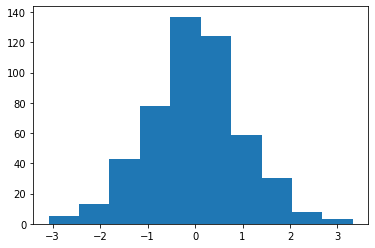

In [55]:
plt.hist(z_group["Age"])

In [56]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [57]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,114.970488,86.044699,29.728648,18684.718706
1,128.110787,54.984097,8.631671,20728.803308
2,130.682692,29.530816,2.414877,19491.537259
3,116.572110,58.558650,16.719435,19594.534408
4,126.187720,34.213938,37.172523,19393.844516
...,...,...,...,...
495,132.938519,99.801364,6.502015,18886.550029
496,176.466556,69.297091,25.473668,20809.651344
497,128.485678,92.298602,33.861630,19421.842800
498,159.825471,84.065439,37.853242,21273.826014


In [58]:
ricos = data2[ data2['Income']>20000.00000 ]
ricos

,Gender,Economic Status,Height,Weight,Age,Income
1,Male,Rich,128.110787,54.984097,8.631671,20728.803308
5,Female,Poor,146.803186,96.841546,35.074597,20679.791951
6,Male,Poor,145.564719,80.191056,52.345923,20297.987534
8,Female,Middle Class,203.751542,92.127216,28.389692,20550.441898
12,Male,Rich,152.590204,45.203561,35.738287,21052.919966
...,...,...,...,...,...,...
489,Male,Poor,173.665408,77.230317,16.584827,20732.356052
490,Male,Rich,170.977753,77.779795,32.872504,21309.831826
493,Male,Poor,196.687682,63.389918,10.821489,20251.692725
496,Male,Rich,176.466556,69.297091,25.473668,20809.651344


In [59]:
ricos.Gender.value_counts()

Female    118
Male      105
Name: Gender, dtype: int64

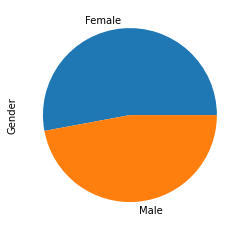

In [60]:
ricos.Gender.value_counts().plot.pie();

In [72]:
import pandas as pd
pd.set_option("display.precision", 2)

In [73]:
data2.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,Female,86.04,29.73,18684.72
1,Female,Rich,Female,54.98,8.63,20728.80
2,Female,Middle Class,Female,29.53,2.41,19491.54
3,Female,Rich,Female,58.56,16.72,19594.53
4,Female,Poor,Female,34.21,37.17,19393.84


In [74]:
data2['Gender']

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
495    Female
496    Female
497    Female
498    Female
499    Female
Name: Gender, Length: 500, dtype: object

In [75]:
data2['Gender']='Female'

<AxesSubplot:>

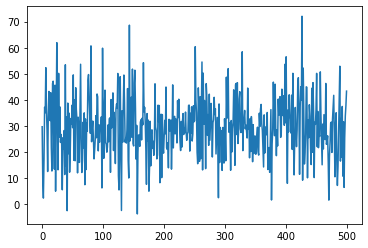

In [77]:
data2.Age.plot.line()